<h1>Parcial 2 (Segunda Parte)</h1>
<h3>Rie Kaneko Bojacá</h3>

In [1]:
import numpy as np
import random as rnd
import string
import matplotlib.pyplot as pl
import time
%matplotlib inline

<h5>Código con Ciclo Anidados</h5>

In [2]:
def levenshtein(str1, str2):
    n = len(str1)
    m = len(str2)
    d = np.zeros((n+1,m+1))
    
    for i in range(n+1):
        d[i][0] = i
    for i in range(m+1):
        d[0][i] = i
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            if str1[i-1] == str2[j-1]:
                a = 0
            else:
                a = 1
            d[i][j] = min(d[i][j-1]+3, d[i-1][j]+2, d[i-1][j-1]+(a*4))
            
    return d[n][m]

<h4>1. Es posible transformar $algorithm$ en $analysis$ sin usar operaciones "izquierda". Escriba una secuencia de operaciones que tenga el mismo costo que el mostrado en el ejemplo pero sin usar operaciones "izquierda".</h4>

    Operación               Z               Costo               Total
-------------------------------------------------------------------------
    Inicialización       algorithm            0                   0
    Derecha              algorithm            0                   0
    insertar(n)          anlgorithm           3                   3
    insertar(a)          analgorithm          3                   6
    Derecha              analgorithm          0                   6
    reemplazar(g->y)     analyorithm          4                   10
    reemplazar(o->s)     analysrithm          4                   14
    reemplazar(r->i)     analysiithm          4                   18
    reemplazar(i->s)     analysisthm          4                   22
    eliminar(t)          analysishm           2                   24
    eliminar(h)          analysism            2                   26
    eliminar(m)          analysis             2                   28

<h4>2. Muestre que para dos cadenas x y y con distancia de edición $d(x, y)$, existe una secuencia S de operaciones que transforman x en y con costo $d(x, y)$ donde S no contiene operaciones "izquierda".</h4>

Para no utilizar el opción "izquierdo", se recorre carácter por carácter de la opción "derecha" y se verifica si el caracter que esta en la primera palabra $z$ coinside con el caracter de la segunda ( $y$ ). 

1. En el caso de que son inguales ( $z[i]=y[i]$ ), no se hace nada y va al siguiente caracter. 
2. En el caso de que no ( $z[i]!=y[i]$ ), se revisa si el carácter $z[i]$ exitsa en algún posición de la palabra $y$ ( $z[i]=y[k]$ ) 
3. Si $z[i]=y[k]$ y $i<k$, entonces se hace la opción "insertar" siempre y cuando no exita caracteres intermedios en la primera palabra ( $z$ ) lo que está entre el caracter $y[i]$ y $y[k]$.
4. En el caso de que no cumpla lo anterior, pero igual existen uno o más caracteres, se hace la opción "reemplazar".
5. Si sobra algún caracter en la palabra $z$ que no tenga la palabra $y$, se elige la opción "eliminar".

<h4>3. Muestre que el problema de calcular la distancia de edición $d(x, y)$ presenta una subestructura óptima.</h4>

El código de distancia en programación dinámica se maneja una sub-estructura óptima la cual se basa en Bottom up. Este algoritmo analiza y compara las palábras de izquierda a derecha, poniendo los costos en la matriz creada (nxm) inicialmente dependiendo de los tres posibles cambios escogiendo siempre el de costo mínimo.
1. Eliminación, con el costo de 2
2. Insersión, con el costo de 3
2. Cambio, con el costo de 4

Una vez se realiza nxm iteraciónes, el valor mínimo total será asignado a la última celda de la matriz, y este valor es retornado.

<h4>4. Recursivamente dena el valor de la distancia de edición $d(x, y)$ en terminos de los sufíjos de las cadenas $x$ y $y$. Señale como la distancia de edición contiene sobre la apamiento de los subproblemas.</h4>

El código recursivo también se realiza en Bottom up a igual que el algoritmo implementado por ciclo anidados, pero se analiza y compará de derecha a izquierda. Este algoritmo cuenta con dos casos bases cuales hacen referencia cuando algunas de las dos paláblas es vacía. Cuando uno de estos casos sucede, se retorna la longitud de la palábra opuesta hasta el primer llamado recursivo donde al igual que el otro algoritmo, se va a evaluando los tres posibles cambios, escogiendo siempre el costo menor.

Allí es donde se ve sobre apamiento de los problemas porque se necesita que los tres llamados de la función realizados retorne el debido valor y así escoger el costo mínimo total.

<h5>Código con Recurrencia</h5>

In [3]:
def levenshtein_rec(a, b):
    if("" == a):
        return len(b)
    if("" == b):
        return len(a)
    return min(lev(a[:-1], b[:-1])+(a[-1] != b[-1])*4, lev(a[:-1], b)+2, lev(a, b[:-1])+3)

<h4>5. Describa un algoritmo de programación dinámica que calcule la distancia de edición de $x$ y $y$. Analise el tiempo de ejecución y el espacio requeridos por su algoritmo.</h4>

El tiempo de ejección del algoritmo de programación dinámica es de $O(nxm)$ en donde la longitud de la primera palabra es $n$ y $m$ la longitud de la segunda. Esto pasa por que se compara carácter por carácter, evaluando los tres casos posibles (eliminacion, inserción y cambio) dentro del ciclo anidados. 
De la misma manera el gasto de memória para este algoritmo es de $O(nxm)$ porque este código hace uso de una matriz de $n$ filas por $m$ columnas, lo cual va a llenando diagonalmente según los costos.

In [4]:
def analysis_time(n):
    timeP = []
    for i in range(n):
        word1 = ''.join(rnd.choice(string.ascii_uppercase) for _ in range(i))
        word2 = ''.join(rnd.choice(string.ascii_uppercase) for _ in range(i))
        
        tic = time.clock()
        levenshtein(word1, word2)
        toc = time.clock()
        timeP.append(toc - tic)
        
    return timeP

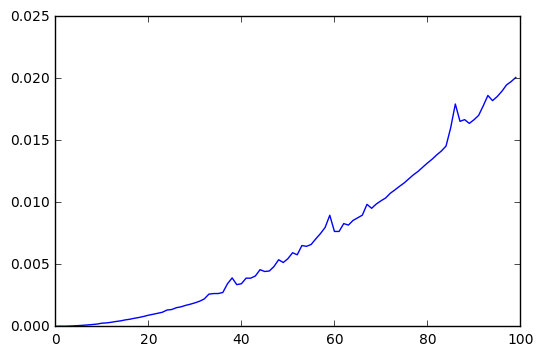

In [5]:
pl.clf()
res = analysis_time(100)
x = np.arange(100)
y = np.array(res)

pl.plot(x, y)

<h4>6. Implemente su algoritmo en Python, y publiquelo en un NoteBook donde lo pruebe para las cadenas:<br>$x = software engineering$ <br>$y = computer science$</h4>

In [6]:
x = "software engineering"
y = "computer science"
print levenshtein(x, y)

44.0


<h4>7. Ejecute su programa para las tres instancias proveidas en 3 archivos de texto plano, donde cada archivo contiene las siguientes cuatro líneas:<br>
(a) El número de caracteres $m$ en la cadena $x$.<br>
(b) La cadena $x$<br>
(c) El número de caracteres $n$ en la cadena $y$.<br>
(d) La cadena $y$.</h4>

In [7]:
def levenshtein_text(str1, str2, n, m):
    d = np.zeros((n+1,m+1))
    
    for i in range(n+1):
        d[i][0] = i
    for i in range(m+1):
        d[0][i] = i
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            if str1[i-1] == str2[j-1]:
                a = 0
            else:
                a = 1
            d[i][j] = min(d[i][j-1]+3, d[i-1][j]+2, d[i-1][j-1]+(a*4))
            
    return d[n][m]

In [8]:
def open_text(name):
    myfile = open(name)
    mytext = []
    for line in myfile:
        mytext.append(line)
    myfile.close()
    return mytext

<h4>Instance</h4>

In [9]:
mytext = open_text('ps7_input1.txt')
print "Distancia: ", levenshtein_text(mytext[1], mytext[3], int(mytext[0]), int(mytext[2]))

Distancia:  1601.0


In [10]:
mytext = open_text('ps7_input2.txt')
print "Distancia: ", levenshtein_text(mytext[1], mytext[3], int(mytext[0]), int(mytext[2]))

Distancia:  1687.0


In [11]:
mytext = open_text('ps7_input3.txt')
print "Distancia: ", levenshtein_text(mytext[1], mytext[3], int(mytext[0]), int(mytext[2]))

Distancia:  1431.0
